<a href="https://colab.research.google.com/github/NathanielJames97/Porfolio/blob/main/Building_a_PyTorch_MNIST_NN_Setup_Workalong_020322.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                                                     transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                                                     transforms.ToTensor()
                       ]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [4]:
import torch.nn as nn
import torch.nn.functional as F
#Interchangable librariers NN is Object Orientated, Functional is functional,  runs asa function



In [6]:
class Net(nn.Module):
  def __init__(self) -> None:
      super().__init__()
      # Define the layers of network : KEY:fc1 = fully connected 1
      #self.fc1 = nn.layer(input, output)
      self.fc1 = nn.Linear(28*28, 64)  # Input is image size when flattened therefore 28x28
      self.fc2 = nn.Linear(64, 64)
      self.fc3 = nn.Linear(64, 64)
      self.fc4 = nn.Linear(64, 10) # Output 10 as there are 10 output classes: Numbers 0-9
    
    #Now we have definied layers, we not need to tell it how to pass through
  def forward(self,x):
    # Pass itself through the layers with an activation function e.g. ReLU, helps prevent results numbers being out of bounds.
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      # Don't need Linear RELU function on output layer to be selective, want a probability output distribution
      # For multiclass outputs usually use softmax
      x = self.fc4(x)
      return F.log_softmax(x, dim=1)

      
      
      
      
      return x



net = Net()
print(net)
      

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
# An example of running random data though the network BASIC
X = torch.rand((28,28))

X = X.view(1, 28*28)

In [10]:
output = net(X)
output

tensor([[-2.3350, -2.2802, -2.2664, -2.4142, -2.4100, -2.3397, -2.3940, -2.1536,
         -2.1731, -2.2978]], grad_fn=<LogSoftmaxBackward0>)

In [20]:
# Goal overtime is to have Loss decrease
import torch.optim as optim
# lr = Learning Rate can be tweaked - Don't want steps too big so you don't miss optimised points
# Don't want it too small as it might think it's optimised too soon
# Correct amount is trial and error - On more complex model use a decaying learning rate to optimise at it goes on.
optimizer = optim.Adam(net.parameters(), lr=0.001)

# We optimise to reduce loss not increase accuracy, it just happens less loss is more accurate

#Each time we do a whole pass through a data its called an Epoch

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    # data is a batch of featureset and labels
    X, y = data
    # Everytime we calc loss and optimise model
    net.zero_grad()
    # Clear gradient each time to reset it all when passing through
    output = net(X.view(-1, 28*28))
    #Now calculate loss
    loss = F.nll_loss(output, y)
    # For one hot outputs use MeanSquareError , for scaler output values use nll_loss or similar, can't use MSE
    loss.backward() # Do back propogation
    optimizer.step() # Adjust weights for us
  print(loss)

tensor(0.8052, grad_fn=<NllLossBackward0>)
tensor(0.0260, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)


In [21]:
#Lets see how good the network is at this point #
correct = 0
total = 0

with torch.no_grad():
  for data in testset:
    X, y = data
    output = net(X.view(-1, 28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print("Accuracy:", round(correct/total, 3))

Accuracy: 0.972


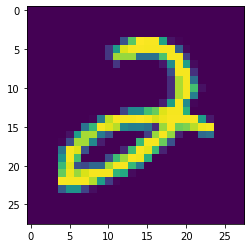

In [26]:
import matplotlib.pyplot as plt

plt.imshow(X[7].view(28,28))
plt.show()

In [27]:
print(torch.argmax(net(X[7].view(-1,784))[0]))

tensor(2)
